In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.mkdir('/content/gdrive/My Drive/MLND-Capstone')

In [0]:
os.chdir('/content/gdrive/My Drive/MLND-Capstone')

In [0]:
pwd

'/content/gdrive/My Drive/MLND-Capstone'

Download the data

In [0]:
!git clone https://github.com/MichaelGerhard/PlantDiseaseData

Cloning into 'PlantDiseaseData'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 54367 (delta 0), reused 0 (delta 0), pack-reused 54365
Receiving objects: 100% (54367/54367), 803.83 MiB | 13.19 MiB/s, done.
Checking out files: 100% (54305/54305), done.


Import Libraries

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Data exploration and preprocessing

In [0]:
PATH = Path('PlantDiseaseData')

In [0]:
bs = 64

In [0]:
plant_data = ImageDataBunch.from_folder(path=PATH, train='Train', valid='Test', ds_tfms=get_transforms(), size=224, bs=bs)
plant_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (43429 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseData;

Valid: LabelList (10876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseData;

Test: None

In [0]:
plant_data.c

38

In [0]:
plant_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

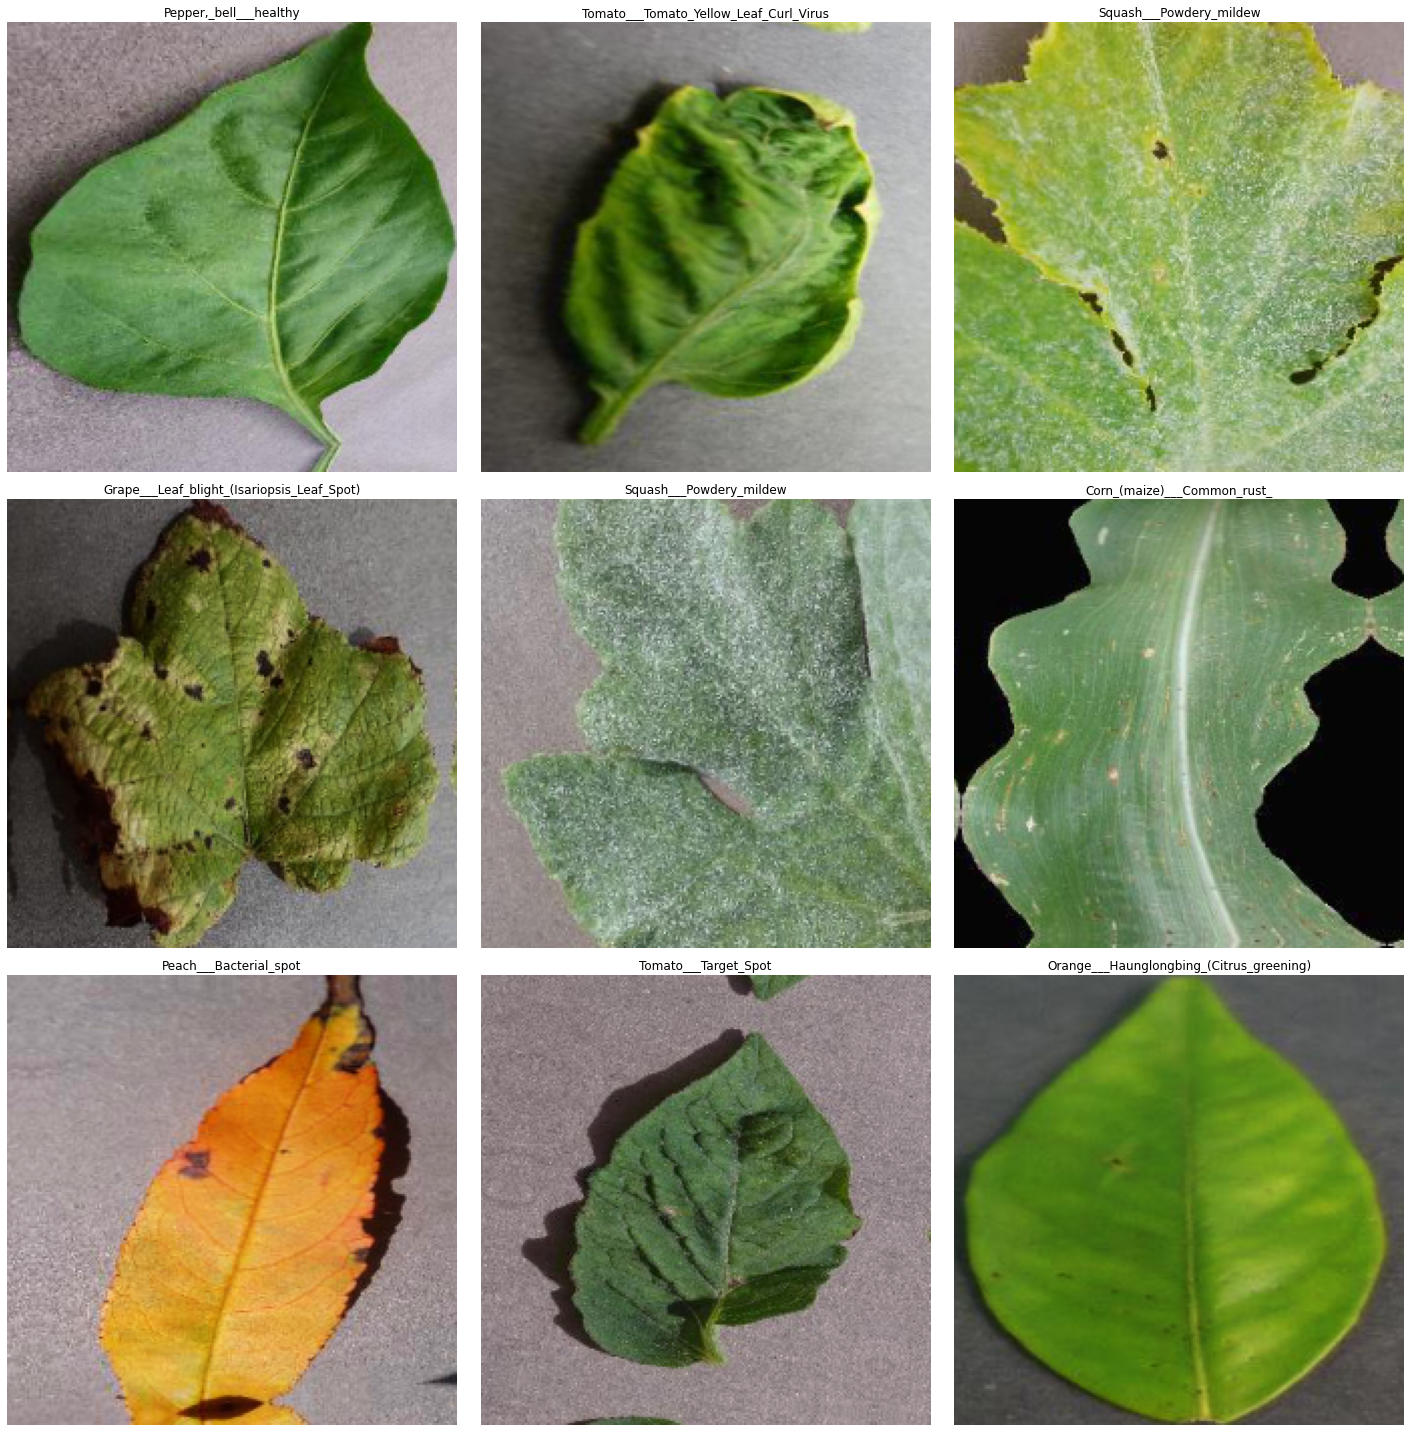

In [0]:
plant_data.show_batch(rows=3, figsize=(20,20))

## Model Selection

In [0]:
learner_50 = cnn_learner(plant_data, models.resnet50, metrics=[accuracy, error_rate])

## Training and Validation

In [0]:
learner_50.fit_one_cycle(4)

## Interpreting Results

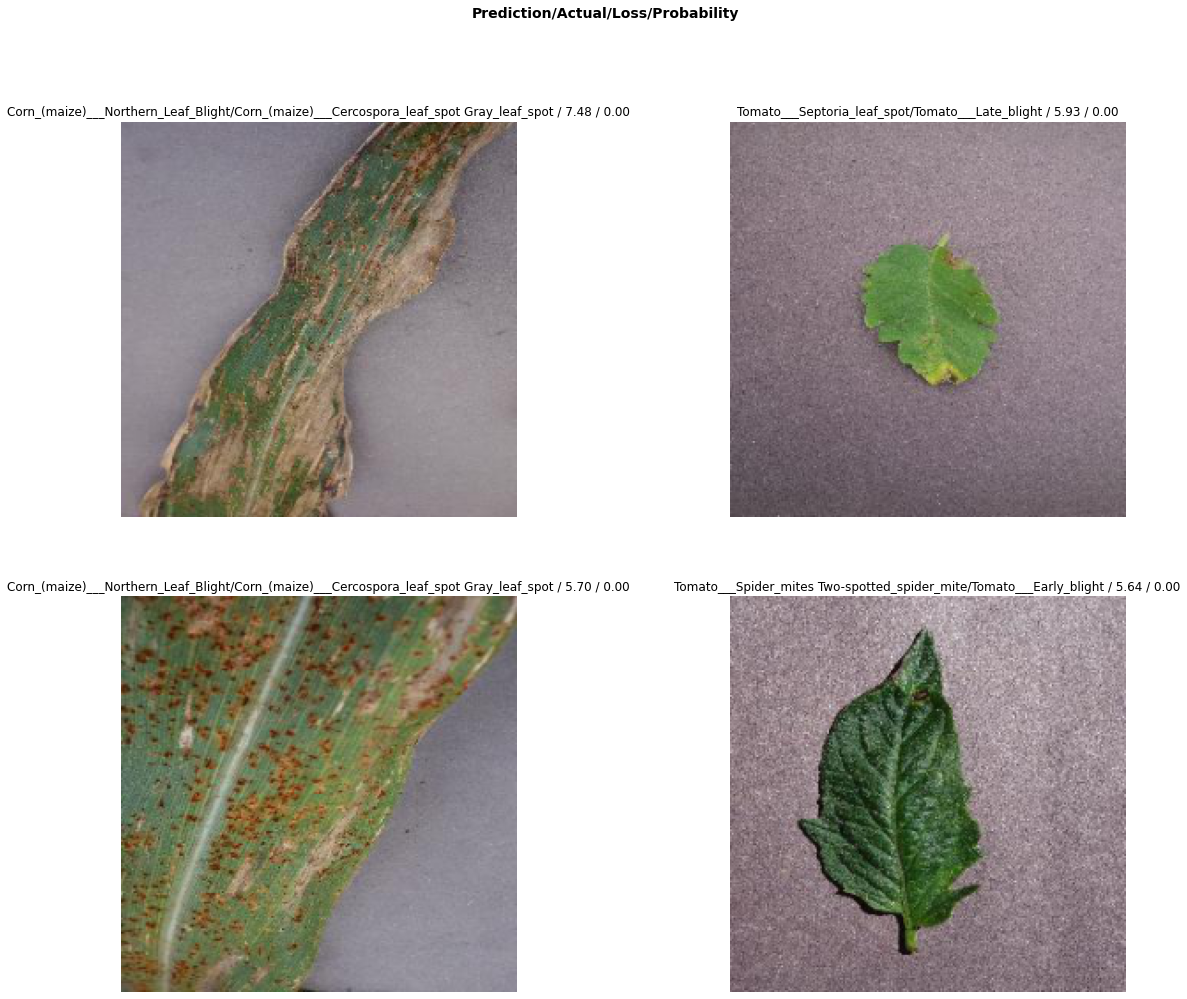

In [0]:
interp = ClassificationInterpretation.from_learner(learner_50)
interp.plot_top_losses(4, figsize=(20,16))

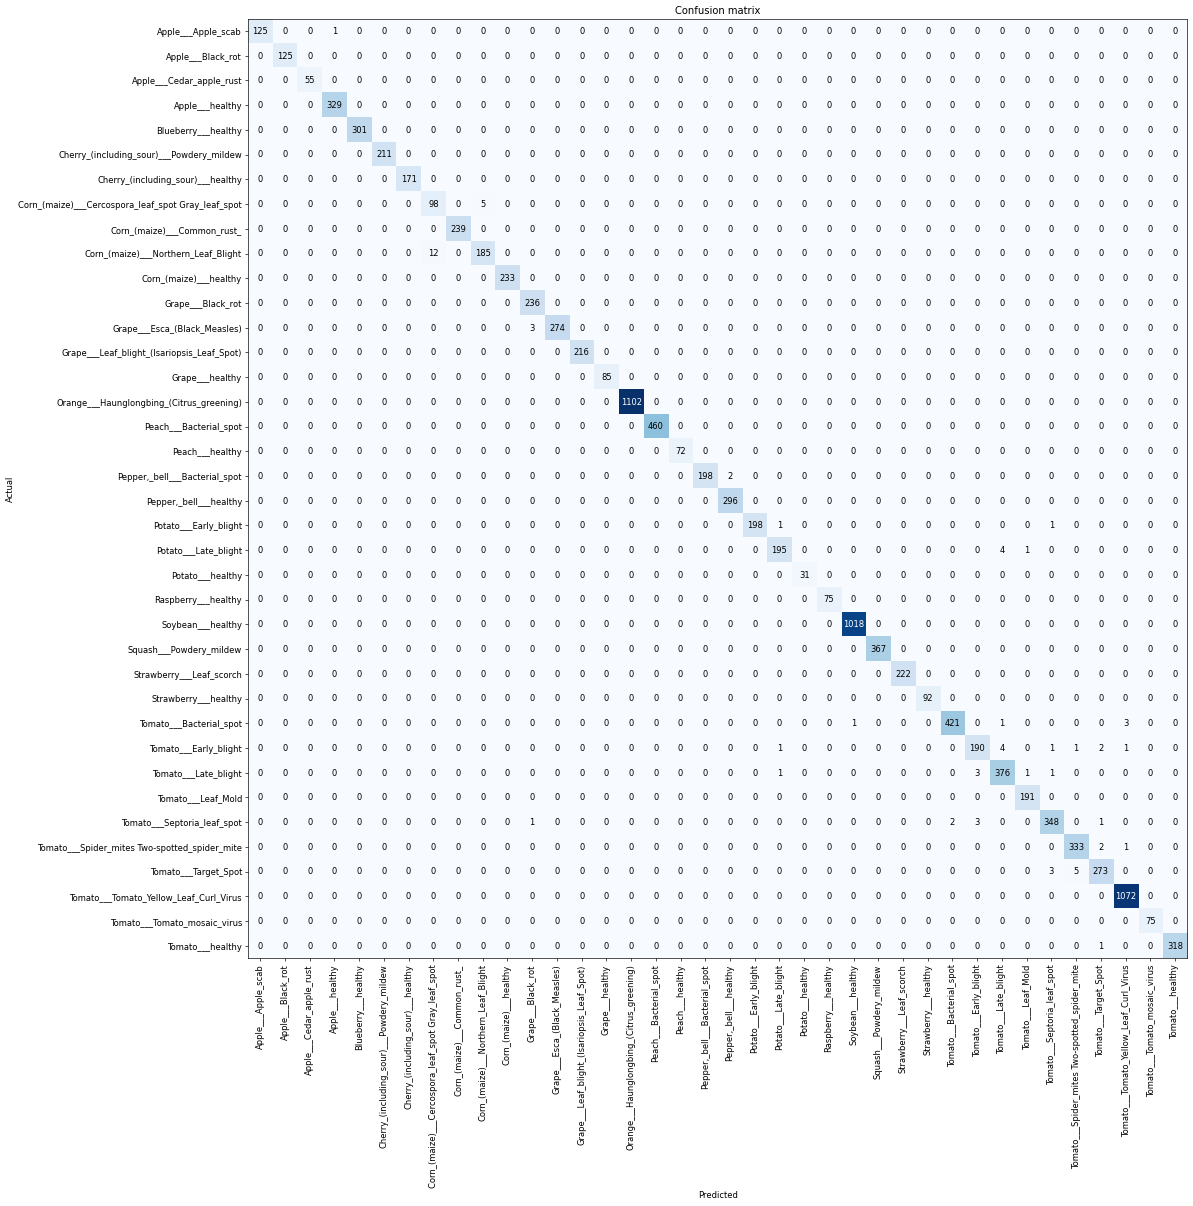

In [0]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [0]:
learner_50.save('learn_4_cycles')

## Hyperparameter Tuning
Finding the learning rate (lr)

In [0]:
learner_50.lr_find(stop_div=False, num_it=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


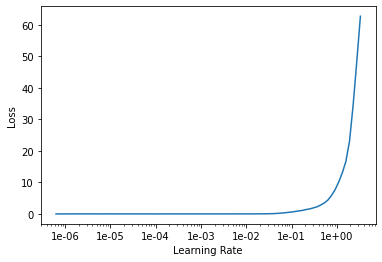

In [0]:
learner_50.recorder.plot()

In [0]:
learner_50.unfreeze()

In [0]:
learner_50.fit_one_cycle(3, max_lr=slice(1e-06, 1e-05))

In [0]:
learner_50.freeze()

In [0]:
learner_50.save('learn_7_cycles')

In [0]:
model.load('learn_7_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (43429 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseData;

Valid: LabelList (10876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseData;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64

## Export Model

In [0]:
model.export('resnet50_model.pkl')

In [0]:
os.chdir('PlantDiseaseData')

In [0]:
ls

models/  resnet50_model.pkl  Test/  Train/
